In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
train_data=X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

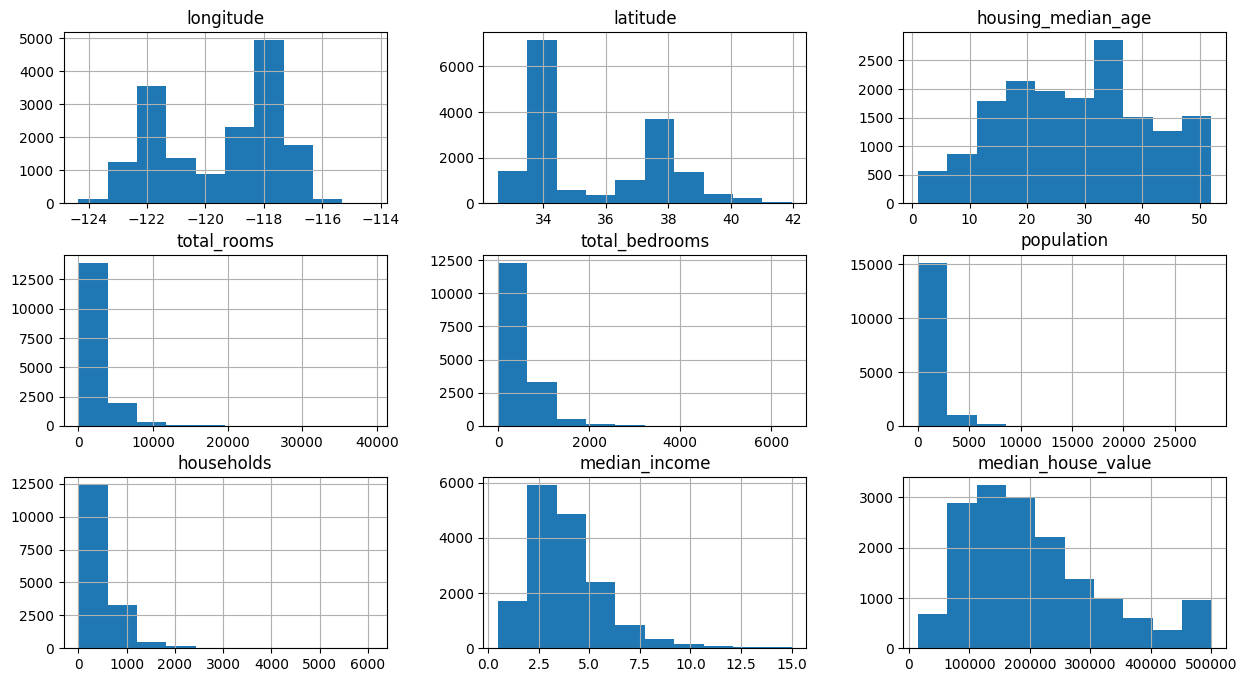

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

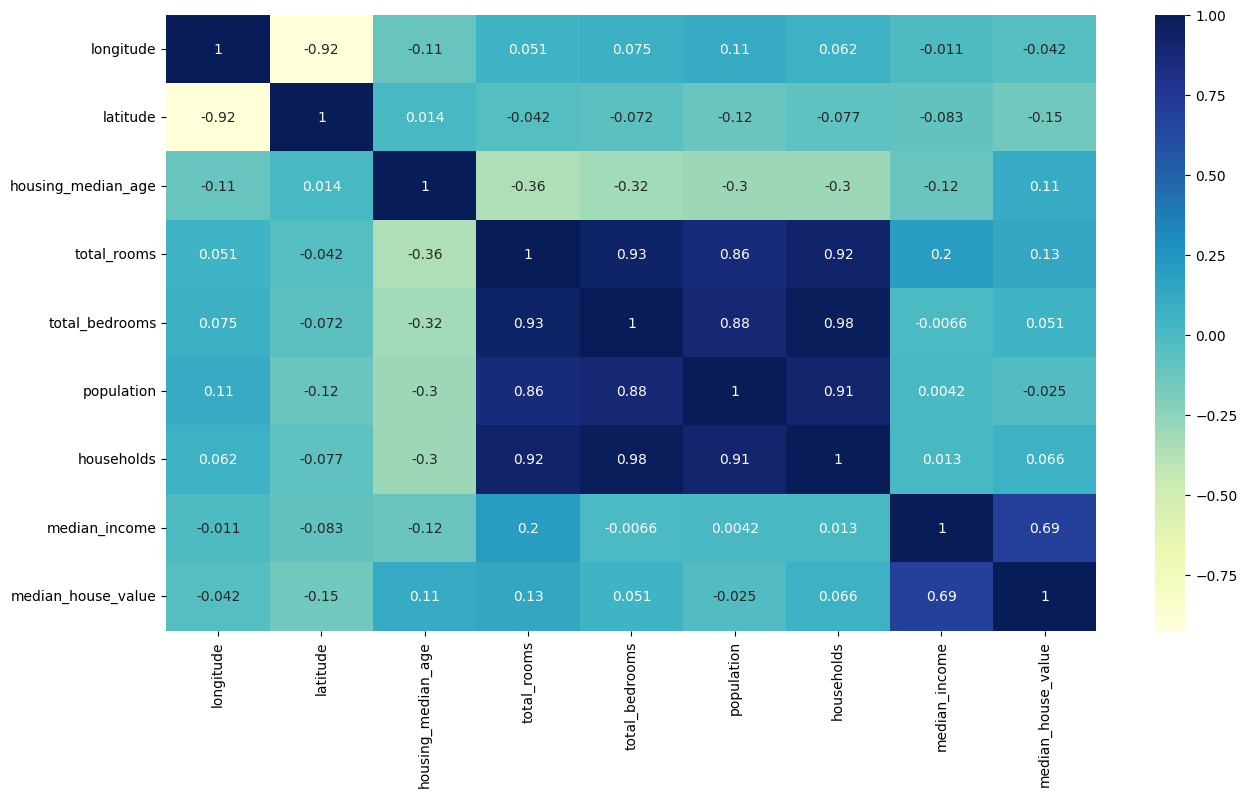

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

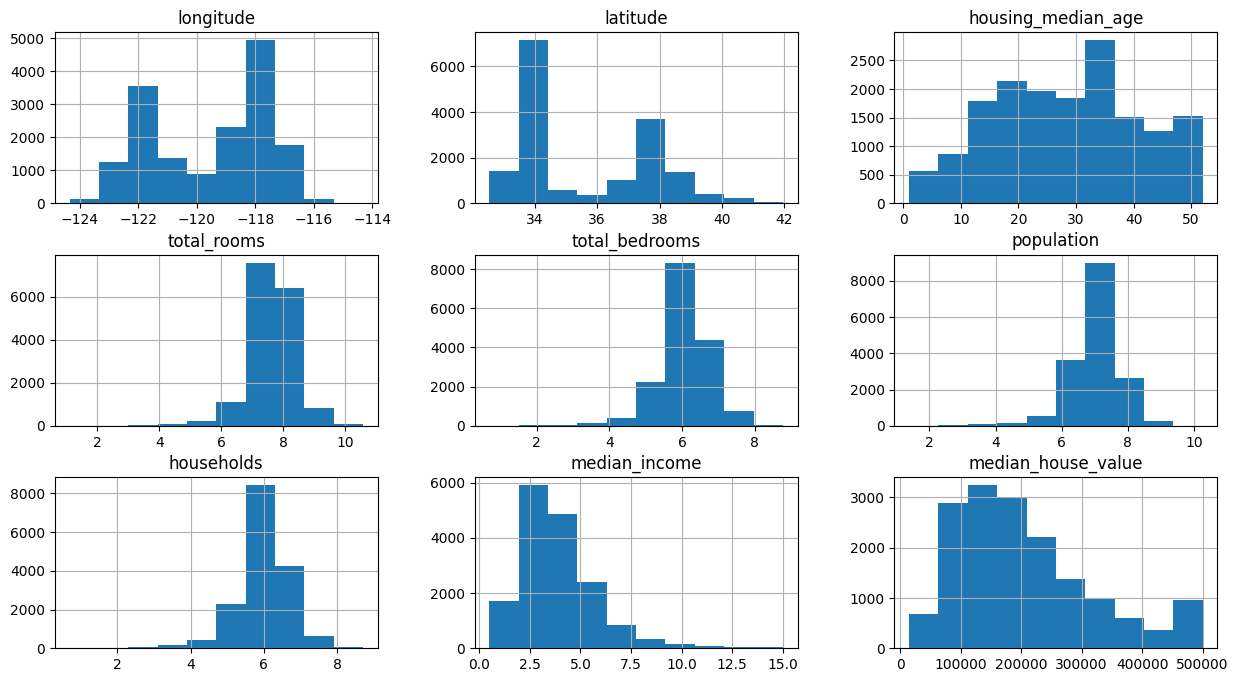

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [15]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9951,-122.40,38.41,20.0,8.490438,6.923629,7.453562,6.923629,2.5685,267600.0,False,True,False,False,False
7612,-118.23,33.89,35.0,7.135687,5.843544,7.486053,5.840642,2.1949,95100.0,True,False,False,False,False
3545,-118.63,34.24,9.0,8.468003,6.829794,7.541683,6.820016,4.8333,277200.0,True,False,False,False,False
9308,-122.54,37.98,52.0,7.472501,5.758902,6.410175,5.579730,5.5083,371900.0,False,False,False,True,False
19189,-122.67,38.44,32.0,8.235361,6.609349,7.488294,6.582025,3.2415,172200.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,-118.02,34.09,32.0,7.466228,5.991465,7.090077,5.998937,3.4286,191800.0,False,True,False,False,False
14117,-117.11,32.73,34.0,7.000334,5.402677,6.354370,5.411646,3.8355,126700.0,False,False,False,False,True
10874,-117.89,33.72,25.0,8.376551,6.742881,8.261785,6.746412,4.6500,197800.0,True,False,False,False,False
1732,-122.35,37.96,32.0,7.596894,6.224558,7.038784,6.049733,2.0353,113600.0,False,False,False,True,False


<Axes: >

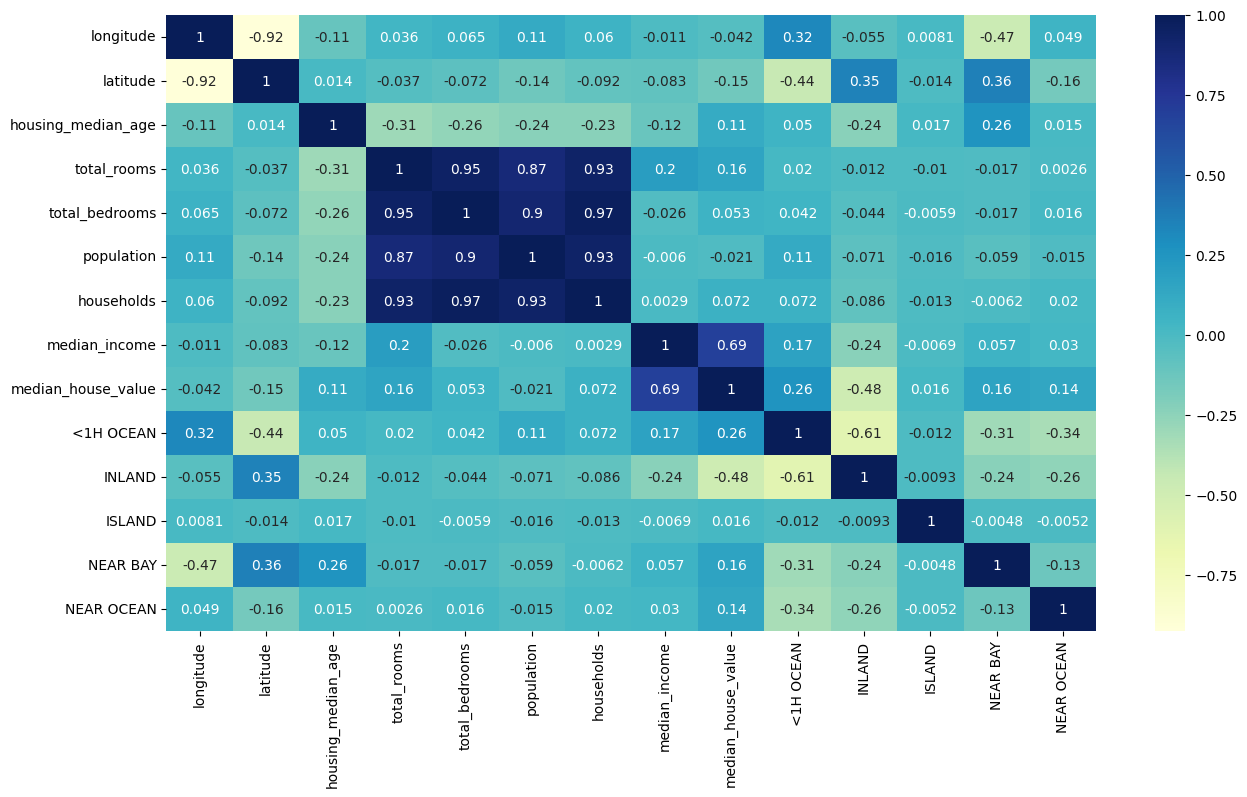

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

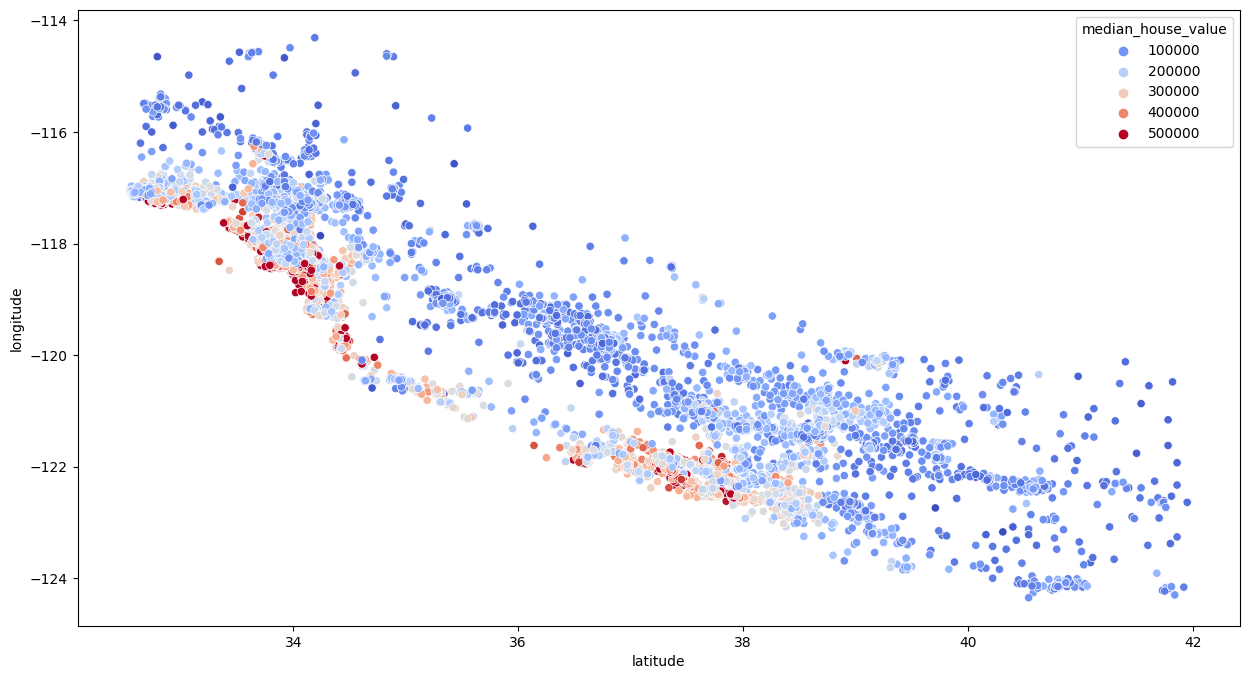

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [18]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

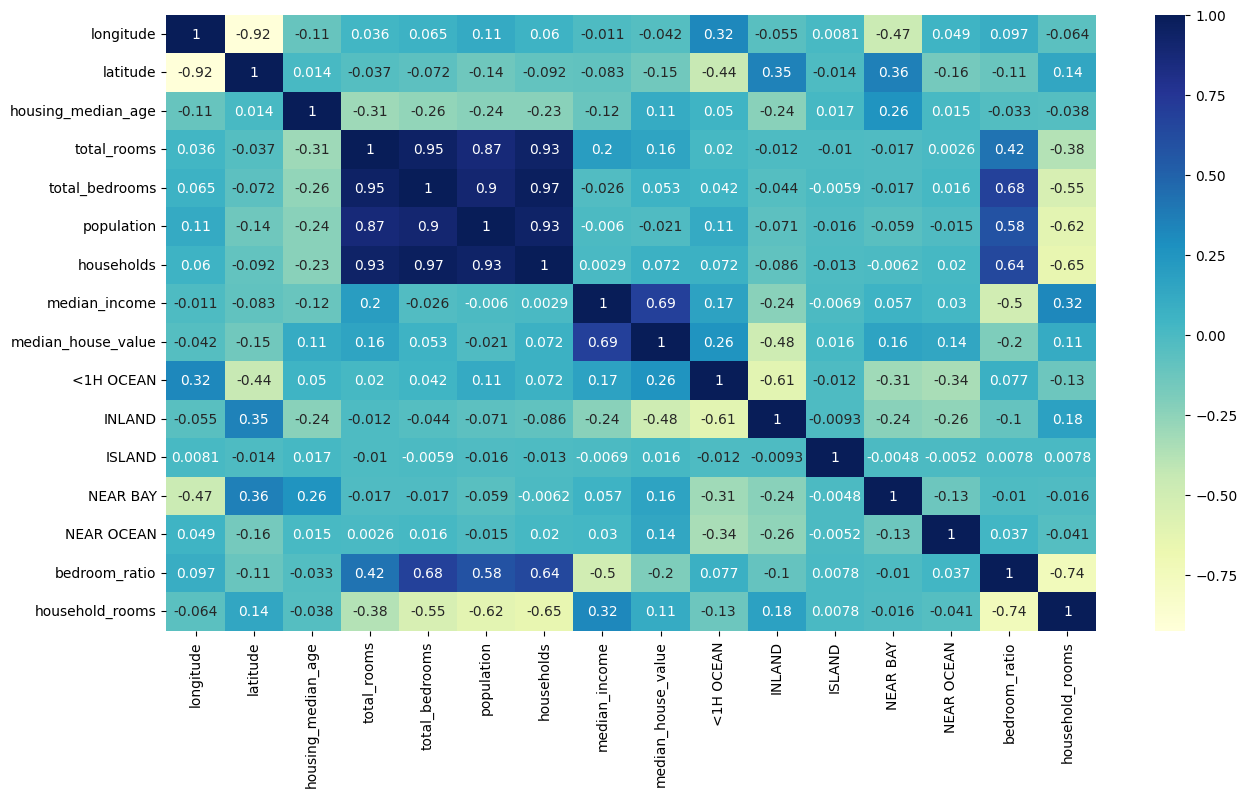

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [20]:
from sklearn.linear_model import LinearRegression

X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
# X_train_s=scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
test_data=X_test.join(y_test)


test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [22]:
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']




In [25]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test,y_test)

0.8259677741142233

In [32]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators":[3,10,30],
    "max_features":[8,12,20],
    "min_samples_split":[2,4,6,8]
    
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "min_samples_split":[None,4,8]
    
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train,y_train)



In [ ]:
grid.search.best_estimator_

In [ ]:
RandomForestRegressor(n_estimators=200)

In [ ]:
grid_search.best_estimator.score(X_test,y_test)